In [1]:
####################################################################
###    This is the PYTHON version of program 3.2 from page 64 of   #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
###																   #
### It is the SIS model with m different risk-groups			   #
### Note we no-longer explicitly model the susceptible class.	   #
####################################################################b

In [2]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

*m is the number of risk groups.

*beta is the (m×m) matrix of transmission rates and incorporates the encounter rate between susceptible and infectious individuals together with the probability of transmission.

*gamma is a vector of recovery rates, one for each risk group.

*n is the vector of proportion of the population that are in each risk group

*I is the vector of initial proportions of the population that are both infectious and in each risk group.

In [3]:
waifw=np.array([0.0, 3.0, 10.0, 60.0, 100.0])
beta=0.0016*np.outer(waifw,waifw)
gamma=0.2*np.array([1.0, 1.0, 1.0, 1.0, 1.0])
n=np.array([0.06, 0.31, 0.52, 0.08, 0.03])
I=np.array([0.0, 0.0, 0.0, 0.0, 1e-5])
ND=30
TS=1.0
m=5
INPUT=I
print(beta)

[[0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 1.44e-02 4.80e-02 2.88e-01 4.80e-01]
 [0.00e+00 4.80e-02 1.60e-01 9.60e-01 1.60e+00]
 [0.00e+00 2.88e-01 9.60e-01 5.76e+00 9.60e+00]
 [0.00e+00 4.80e-01 1.60e+00 9.60e+00 1.60e+01]]


In [4]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((m))
	V = INP    
	for i in range(m):
		Y[i] = np.multiply(np.dot(beta[i], V), (n[i]-V[i]))-gamma[i]*V[i]
	return Y   # For odeint

t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)
print(RES)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e-05]
 [0.00000000e+00 2.13340425e-06 1.19286097e-05 1.10103502e-05
  1.50662624e-05]
 [0.00000000e+00 6.62991190e-06 3.70694660e-05 3.42113157e-05
  2.80763687e-05]
 [0.00000000e+00 1.66060167e-05 9.28444502e-05 8.56604139e-05
  5.89930894e-05]
 [0.00000000e+00 3.91515454e-05 2.18876181e-04 2.01804482e-04
  1.30480746e-04]
 [0.00000000e+00 9.03467578e-05 5.04974460e-04 4.64878819e-04
  2.93560720e-04]
 [0.00000000e+00 2.06290415e-04 1.15245949e-03 1.05729781e-03
  6.60510891e-04]
 [0.00000000e+00 4.66007081e-04 2.60056481e-03 2.36748203e-03
  1.46575702e-03]
 [0.00000000e+00 1.03306847e-03 5.75137711e-03 5.14859979e-03
  3.14246539e-03]
 [0.00000000e+00 2.20685368e-03 1.22254700e-02 1.05718383e-02
  6.28002531e-03]
 [0.00000000e+00 4.40813697e-03 2.41913292e-02 1.96179148e-02
  1.11099230e-02]
 [0.00000000e+00 7.95299462e-03 4.29724562e-02 3.14884441e-02
  1.66330099e-02]
 [0.00000000e+00 1.27020933e-02 6.716373

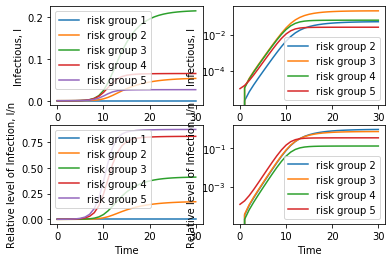

In [5]:
pl.subplot(221)
for i in range(m):
	pl.plot(RES[:,i], label = 'risk group %s' %(i+1))
pl.ylabel('Infectious, I')
pl.xlabel('Time')
pl.legend(loc=0)
pl.subplot(222)
for i in range(m-1):
	pl.semilogy(RES[:,i+1], label = 'risk group %s' %(i+2))
pl.ylabel('Infectious, I')
pl.xlabel('Time')
pl.legend(loc=0)
pl.subplot(223)
for i in range(m):
	pl.plot(RES[:,i]/n[i], label = 'risk group %s' %(i+1))
pl.ylabel('Relative level of Infection, I/n')
pl.xlabel('Time')
pl.legend(loc=0)
pl.subplot(224)
for i in range(m-1):
	pl.semilogy(RES[:,i+1]/n[i], label = 'risk group %s' %(i+2))
pl.ylabel('Relative level of Infection, I/n')
pl.xlabel('Time')
pl.legend(loc=0)

pl.show()